In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/owid-energy-data.csv')

df.head()


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [6]:
# Shape of dataset
df.shape

# Column names & data types
df.info()

# Statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23195 entries, 0 to 23194
Columns: 130 entries, country to wind_share_energy
dtypes: float64(127), int64(1), object(2)
memory usage: 23.0+ MB


,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,23195.000000,1.872400e+04,1.178000e+04,2070.000000,7903.000000,6338.000000,8057.000000,5754.000000,6064.000000,6041.000000,...,7620.000000,6379.000000,2798.000000,6293.000000,6405.000000,8301.000000,9391.000000,5145.000000,7548.000000,6379.000000
mean,1975.859280,1.059285e+08,4.257565e+11,43.478804,1.054261,55.157112,15.092054,69.367177,12.139736,1.937451,...,0.919696,0.219802,290.408294,6.021235,48.691257,63.618830,19.534656,214.958712,1.568998,0.518141
std,35.207901,4.701892e+08,3.507870e+12,286.672317,6.641947,180.660550,75.942529,199.453587,51.699422,5.341957,...,2.815237,0.766125,6070.498582,34.260028,281.755752,259.476896,117.215439,733.879417,4.702507,1.722172
min,1900.000000,1.776000e+03,1.642060e+08,-100.000000,-59.084000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,-46.535000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1949.000000,1.595530e+06,1.426394e+10,-0.968000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.329000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1985.000000,6.951653e+06,4.357680e+10,6.695500,0.000000,0.000000,0.000000,0.786000,0.020000,0.148000,...,0.000000,0.000000,18.349500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2005.000000,2.579131e+07,1.830576e+11,23.320750,0.000000,0.506750,0.062000,42.899500,0.870000,1.581000,...,0.201500,0.006000,45.210750,0.096000,0.916000,1.692000,0.100000,25.914000,0.508250,0.074500
max,2024.000000,8.161973e+09,1.301126e+14,6373.062000,144.290000,2587.708000,1366.878000,2450.791000,704.810000,77.586000,...,50.000000,9.881000,242384.859000,642.617000,6124.465000,3798.438000,2505.350000,9315.287000,58.357000,26.085000


# 1.1 Exploratory Data Analysis and Data Understanding
# 1.1.1 List key attributes with brief descriptions


# 1.2 Data Cleaning & Preprocessing


In [7]:
# Keep only rows with valid target
df_clean = df[df['greenhouse_gas_emissions'].notna()].copy()

In [8]:
# Select useful features
features = [
    'year', 'population', 'gdp',
    'coal_consumption', 'oil_consumption', 'gas_consumption',
    'fossil_fuel_consumption', 'renewables_consumption',
    'nuclear_consumption', 'hydro_consumption',
    'primary_energy_consumption',
    'fossil_share_energy', 'renewables_share_energy'
]

In [12]:
df_clean = df_clean.fillna(df_clean.median(numeric_only=True))

In [13]:
target = 'greenhouse_gas_emissions'
df_clean = df_clean[features + [target]]

In [14]:
print("After cleaning → shape:", df_clean.shape)

After cleaning → shape: (5763, 14)


# 2. Exploratory Data Analysis (EDA)

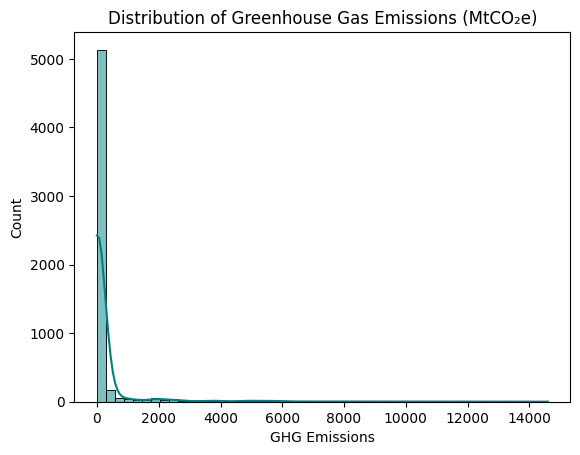

In [ ]:
# 2.1 Target distribution
plt.figure()
sns.histplot(df_clean[target], bins=50, kde=True, color='teal')
plt.title("Distribution of Greenhouse Gas Emissions (MtCO₂e)")
plt.xlabel("GHG Emissions")
plt.show()

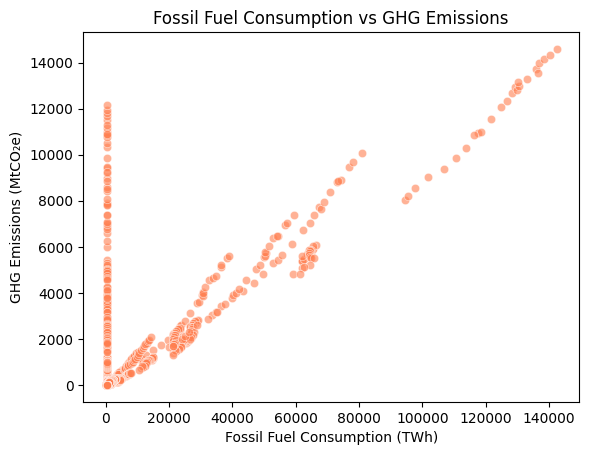

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.scatterplot(x='fossil_fuel_consumption', y=target, data=df_clean, alpha=0.6, color='coral')
plt.title("Fossil Fuel Consumption vs GHG Emissions")
plt.xlabel("Fossil Fuel Consumption (TWh)")
plt.ylabel("GHG Emissions (MtCO₂e)")
plt.show()

Insight: Very strong positive relationship between fossil fuels and emissions.

# 3. Data Preparation for Modeling


In [ ]:
X = df_clean[features]
y = df_clean[target]

In [ ]:
# Log-transform target (handles skewness)
y_log = np.log1p(y)

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_scaled, y_log, test_size=0.20, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (4610, 13)
Test shape : (1153, 13)


# Task 2 – Neural Network Regression Model (MLP)

In [26]:
df_task2 = df[df['greenhouse_gas_emissions'].notna()].copy()

X = df_task2[features].fillna(df_task2[features].median(numeric_only=True))
y = df_task2['greenhouse_gas_emissions']

In [27]:
y_log = np.log1p(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_scaled, y_log, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (4610, 13)
Test shape : (1153, 13)


In [20]:
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    random_state=42,
    verbose=False
)

In [28]:
mlp.fit(X_train, y_train_log)

print("MLP training finished.")
print("Number of iterations:", mlp.n_iter_)

MLP training finished.
Number of iterations: 279


In [ ]:
y_train_pred_log = mlp.predict(X_train)
y_test_pred_log  = mlp.predict(X_test)

y_train_pred = np.expm1(y_train_pred_log)
y_test_pred  = np.expm1(y_test_pred_log)

y_train_true = np.expm1(y_train_log)
y_test_true  = np.expm1(y_test_log)

In [ ]:
# Metrics function
def print_metrics(name, y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    mae  = mean_absolute_error(y_true, y_pred)

    print(f"\n{name}:")
    print(f"  MSE  : {mse:,.1f}")
    print(f"  RMSE : {rmse:,.1f}")
    print(f"  R²   : {r2:.4f}")
    print(f"  MAE  : {mae:,.1f}")

print_metrics("Training set", y_train_true, y_train_pred)
print_metrics("Test set", y_test_true, y_test_pred)


Training set:
  MSE  : 734,091.0
  RMSE : 856.8
  R²   : 0.6006
  MAE  : 155.7

Test set:
  MSE  : 1,331,277.1
  RMSE : 1,153.8
  R²   : 0.3608
  MAE  : 222.9


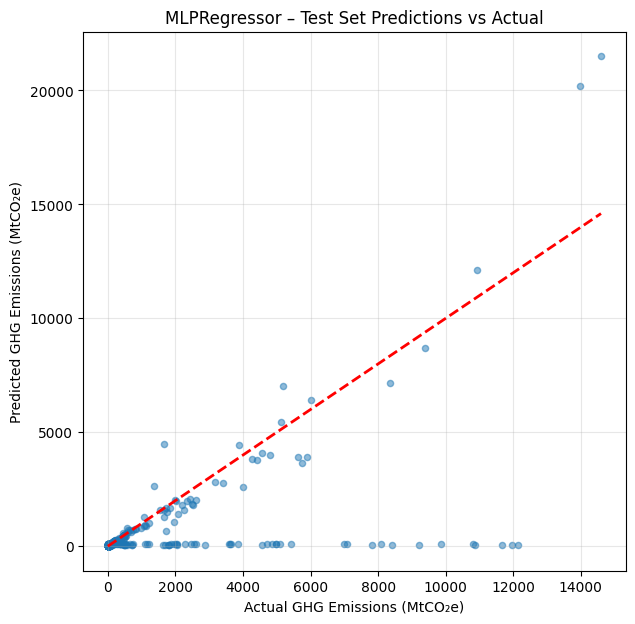

In [ ]:
# Simple plot: predictions vs actual (test set)
plt.figure(figsize=(7,7))
plt.scatter(y_test_true, y_test_pred, alpha=0.5, s=20)
plt.plot([0, y_test_true.max()], [0, y_test_true.max()], 'r--', lw=2)
plt.xlabel("Actual GHG Emissions (MtCO₂e)")
plt.ylabel("Predicted GHG Emissions (MtCO₂e)")
plt.title("MLPRegressor – Test Set Predictions vs Actual")
plt.grid(True, alpha=0.3)
plt.show()

#Task 3 – Build Primary Machine Learning Models
# Two Classical Regression Models

In [30]:
X = df[features].fillna(df[features].median(numeric_only=True))
y = df['greenhouse_gas_emissions']

#2. Train / Test Split
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_scaled, y_log,
    test_size=0.20,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape    :", X_test.shape)

Training set shape: (4610, 13)
Test set shape    : (1153, 13)


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )
}

results = []

In [ ]:
for name, model in models.items():
    # Train
    model.fit(X_train, y_train_log)

    # Predict (log scale) → convert back to original scale
    y_pred_log_train = model.predict(X_train)
    y_pred_log_test  = model.predict(X_test)

    y_pred_train = np.expm1(y_pred_log_train)
    y_pred_test  = np.expm1(y_pred_log_test)

    y_true_train = np.expm1(y_train_log)
    y_true_test  = np.expm1(y_test_log)

    # Metrics
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    rmse_test  = np.sqrt(mean_squared_error(y_true_test,  y_pred_test))

    r2_train = r2_score(y_true_train, y_pred_train)
    r2_test  = r2_score(y_true_test,  y_pred_test)

    mae_test = mean_absolute_error(y_true_test, y_pred_test)

    results.append({
        'Model': name,
        'Train RMSE': round(rmse_train, 2),
        'Test RMSE': round(rmse_test, 2),
        'Test R²': round(r2_test, 3),
        'Test MAE': round(mae_test, 2)
    })

    print(f"\n{name}")
    print(f"  Train RMSE : {rmse_train:,.2f}")
    print(f"  Test RMSE  : {rmse_test:,.2f}")
    print(f"  Test R²    : {r2_test:.3f}")
    print(f"  Test MAE   : {mae_test:,.2f}")


Linear Regression
  Train RMSE : 50,303.17
  Test RMSE  : 85,142.07
  Test R²    : -3479.557
  Test MAE   : 3,400.49

Random Forest
  Train RMSE : 663.03
  Test RMSE  : 987.01
  Test R²    : 0.532
  Test MAE   : 169.13


In [ ]:
print("\n" + "="*50)
print("Comparison of Primary Regression Models (Test Set)")
print(pd.DataFrame(results).to_string(index=False))
print("="*50)


Comparison of Primary Regression Models (Test Set)
            Model  Train RMSE  Test RMSE   Test R²  Test MAE
Linear Regression    50303.17   85142.07 -3479.557   3400.49
    Random Forest      663.03     987.01     0.532    169.13


# Task 4 – Hyperparameter Optimization with Cross-Validation


In [32]:
X = df[features].fillna(df[features].median(numeric_only=True))
y = df['greenhouse_gas_emissions']

# Train-test split
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_scaled, y_log, test_size=0.20, random_state=42
)

print("Train shape for CV:", X_train.shape)

Train shape for CV: (4610, 13)


#2. Define Models and Key Hyperparameters

# Model 1: Linear Regression

In [ ]:
lr_param_grid = {
    'fit_intercept': [True, False],
    'positive': [False, True]
}

lr = LinearRegression()

# Model 2: Random Forest Regressor

In [ ]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [ ]:
# Scoring metric: R²
scorer = make_scorer(r2_score)

# GridSearchCV for both models


In [ ]:
print("\nStarting hyperparameter tuning...\n")

# 3.1 Linear Regression
print("Tuning Linear Regression...")
grid_lr = GridSearchCV(
    estimator=lr,
    param_grid=lr_param_grid,
    cv=5,
    scoring=scorer,
    n_jobs=-1,
    verbose=1
)
grid_lr.fit(X_train, y_train_log)


Starting hyperparameter tuning...

Tuning Linear Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'positive': [False, True]},
             scoring=make_scorer(r2_score, response_method='predict'),
             verbose=1)

In [ ]:
# 3.2 Random Forest
print("\nTuning Random Forest (this may take longer)...")
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring=scorer,
    n_jobs=-1,
    verbose=2
)
grid_rf.fit(X_train, y_train_log)


Tuning Random Forest (this may take longer)...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(r2_score, response_method='predict'),
             verbose=2)

# Best Hyperparameters & CV Scores

In [ ]:
def print_best_results(grid, model_name):
    print(f"\n{'='*50}")
    print(f"Best results for {model_name}")
    print(f"{'='*50}")
    print("Best parameters:")
    for param, value in grid.best_params_.items():
        print(f"  {param:25}: {value}")
    print(f"\nBest CV R² score (mean): {grid.best_score_:.4f}")
    print(f"{'='*50}\n")

print_best_results(grid_lr, "Linear Regression")
print_best_results(grid_rf, "Random Forest Regressor")


Best results for Linear Regression
Best parameters:
  fit_intercept            : True
  positive                 : False

Best CV R² score (mean): 0.4962


Best results for Random Forest Regressor
Best parameters:
  max_depth                : None
  min_samples_leaf         : 1
  min_samples_split        : 2
  n_estimators             : 200

Best CV R² score (mean): 0.9770



In [ ]:
print("\nRandom Forest – Top 3 results:")
cv_results = pd.DataFrame(grid_rf.cv_results_)
top_results = cv_results[['params', 'mean_test_score', 'std_test_score']].sort_values(
    'mean_test_score', ascending=False
).head(3)

print(top_results.to_string(index=False))


Random Forest – Top 3 results:
                                                                                 params  mean_test_score  std_test_score
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}         0.976969        0.003655
  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}         0.976968        0.003651
  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}         0.976968        0.003654


# Task 5 – Feature Selection

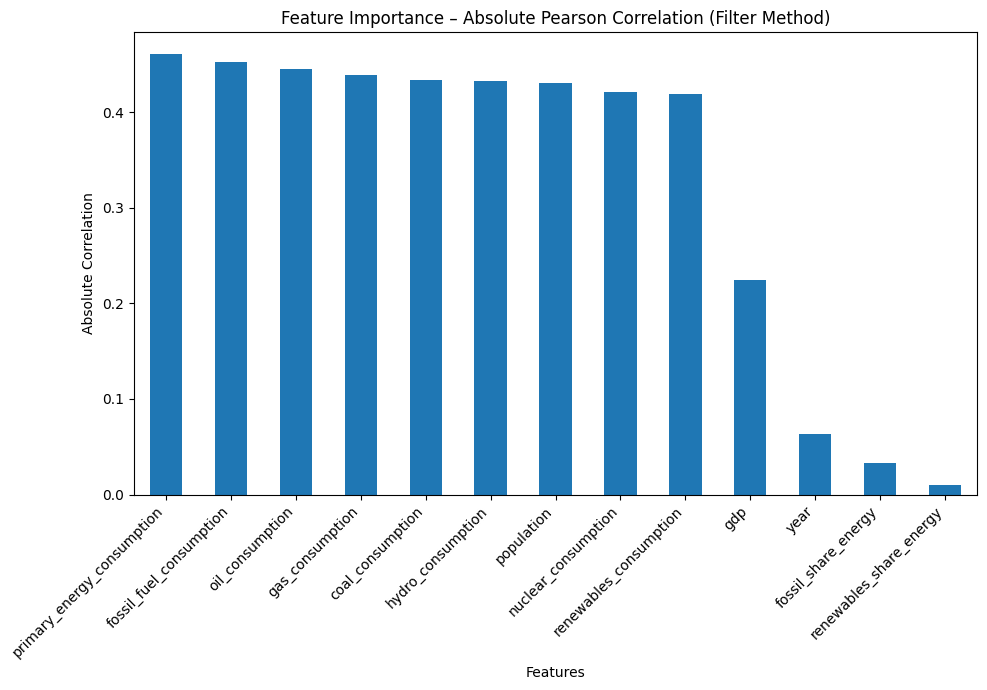


Selected top features (Correlation filter):
['primary_energy_consumption', 'fossil_fuel_consumption', 'oil_consumption', 'gas_consumption', 'coal_consumption', 'hydro_consumption', 'population', 'nuclear_consumption']


In [33]:
# Correlation filter
corr_scores = pd.Series(
    np.abs(X.corrwith(y_log)),
    index=features
).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 7))
corr_scores.plot(kind='bar')
plt.title('Feature Importance – Absolute Pearson Correlation (Filter Method)')
plt.ylabel('Absolute Correlation')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Select top features
n_selected = 8
selected_features = corr_scores.head(n_selected).index.tolist()

print("\nSelected top features (Correlation filter):")
print(selected_features)


Task 6 – Final Models and Comparative Analysis

In [36]:
models = ['Linear Regression', 'Random Forest', 'Final Linear Regression', 'Final Random Forest']
train_rmse = [50303.17, 663.03, np.nan, np.nan]
test_rmse  = [85142.07, 987.01, 100446.81, 984.59]
test_r2    = [-3479.557, 0.532, -4843.319, 0.535]
test_mae   = [3400.49, 169.13, np.nan, np.nan]

df_compare = pd.DataFrame({
    'Model': models,
    'Train RMSE': train_rmse,
    'Test RMSE': test_rmse,
    'Test R²': test_r2,
    'Test MAE': test_mae
})

df_compare.style\
    .set_caption("Main Model Comparison (Log-transformed target, original scale metrics)")\
    .format(precision=2)\
    .highlight_max(subset=['Test R²'], color='#d4edda')\
    .highlight_min(subset=['Test RMSE', 'Test MAE'], color='#d4edda')

,Model,Train RMSE,Test RMSE,Test R²,Test MAE
0,Linear Regression,50303.17,85142.07,-3479.56,3400.49
1,Random Forest,663.03,987.01,0.53,169.13
2,Final Linear Regression,nan,100446.81,-4843.32,nan
3,Final Random Forest,nan,984.59,0.54,nan


In [40]:
data = {
    'Model': [
        'Linear Regression (Train)',
        'Linear Regression (Test)',
        'Random Forest (Train)',
        'Random Forest (Test)',
        'Final Linear Regression',
        'Final Random Forest'
    ],
    'RMSE': [50303.17, 85142.07, 663.03, 987.01, 100446.81, 984.59],
    'R²': [None, -3479.557, None, 0.532, -4843.319, 0.535],
    'MAE': [None, 3400.49, None, 169.13, None, None],
    'Note': [
        'Log target',
        'Log target → original scale',
        'Log target',
        'Log target → original scale',
        'Final LR (log → original)',
        'Final RF (log → original)'
    ]
}

df = pd.DataFrame(data)

df_styled = df.style\
    .set_caption("Comparison of All Model Results (from your screenshots)")\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('text-align', 'left')]},
        {'selector': 'td', 'props': [('text-align', 'left')]}
    ])\
    .format({
        'RMSE': '{:,.2f}',
        'R²': lambda x: '{:.4f}'.format(x) if pd.notnull(x) else '-',
        'MAE': lambda x: '{:,.2f}'.format(x) if pd.notnull(x) else '-'
    })

df_styled

,Model,RMSE,R²,MAE,Note
0,Linear Regression (Train),"50,303.17",-,-,Log target
1,Linear Regression (Test),"85,142.07",-3479.5570,"3,400.49",Log target → original scale
2,Random Forest (Train),663.03,-,-,Log target
3,Random Forest (Test),987.01,0.5320,169.13,Log target → original scale
4,Final Linear Regression,"100,446.81",-4843.3190,-,Final LR (log → original)
5,Final Random Forest,984.59,0.5350,-,Final RF (log → original)
